# 1.项目概述

+ 本项目需解决的问题

本项目通过利用P2P平台Lending Club的贷款数据，进行机器学习，构建贷款违约预测模型，对新增贷款申请人进行预测是否会违约，从而决定是否放款。

+ 建模思路
以下是本次项目机器学习工作流程，实际操作中，其实每个步骤都是反复迭代的过程。

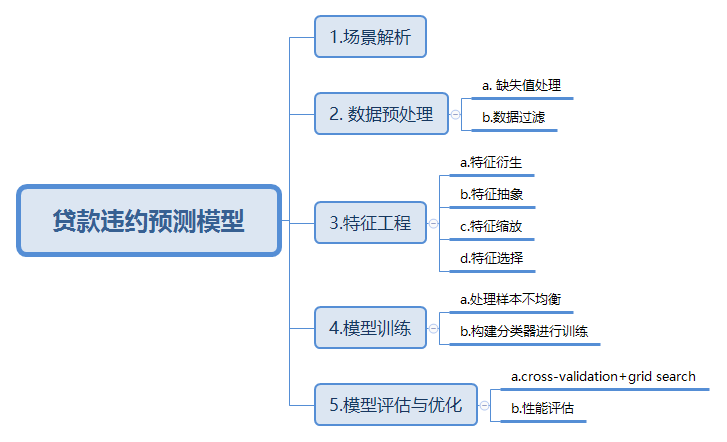

# 2.项目背景

Lending Club 是全球最大的撮合借款人和投资人的线上金融平台，它利用互联网模式建立了一种比传统银行系统更有效率的、能够在借款人和投资人之间自由配置资本的机制。
通过Lending Club 的平台，借款人和小微企业可以获得更低的利率，投资人则可以获得较好的收益。

公司于2006 年10 月在特拉华州以“SocBank”的名字成立，之后于2006 年11 月更名为Lending Club。

截至 2014 年6 月30 日，Lending Club 累计贷款金额超过50 亿美元，支付给投资人的利息超过4.9 亿美元。

# 3.场景解析（算法选择）

1. 首先，我们的场景是根据用户历史行为来训练模型，通过这个模型对新增贷款人“是否具有偿还能力，是否具有偿还意愿”来进行分析，预测贷款申请人是否会发生违约情况。这是一个监督学问题，我们判定贷款申请人是否违约是一个二元问题，所以我们可以选用逻辑回归来处理。
2. 通过之前对数据集EDA探索发现，部分数据是半结构化数据，需要进行特征抽象

# 4.数据预处理

+ 前期准备

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']#设置字体格式


pd.set_option('display.float_format',lambda x:'%.5f' %x)#设置pandas小数位数

+ 数据获取与解析

In [60]:
ori_data = pd.read_csv('LoanStats_2018Q1.csv')
data = ori_data.copy()
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,...,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,18500.00000,18500.00000,18500.00000,36 months,13.58%,628.52000,C,C2,Teacher,6 years,MORTGAGE,82985.00000,Not Verified,Mar-18,Current,n,nan,nan,home_improvement,Home improvement,070xx,NJ,18.66000,1.00000,Apr-04,0.00000,11.00000,97.00000,22.00000,1.00000,13970.00000,35.10%,44.00000,w,...,27400.00000,61030.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,7000.00000,7000.00000,7000.00000,36 months,7.34%,217.23000,A,A4,vice president,10+ years,MORTGAGE,180700.00000,Not Verified,Mar-18,Current,n,nan,nan,debt_consolidation,Debt consolidation,606xx,IL,18.98000,1.00000,Jun-04,1.00000,19.00000,nan,13.00000,0.00000,10546.00000,36.90%,17.00000,w,...,17900.00000,129270.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,16000.00000,16000.00000,16000.00000,60 months,11.98%,355.75000,B,B5,Administrative Assistant,5 years,MORTGAGE,95000.00000,Not Verified,Mar-18,Current,n,nan,nan,home_improvement,Home improvement,820xx,WY,11.79000,0.00000,Apr-96,1.00000,29.00000,nan,11.00000,0.00000,10481.00000,41.30%,24.00000,w,...,13300.00000,22864.00000,17081.00000,Oct-00,0.00000,1.00000,3.00000,20.70000,1.00000,4.00000,0.00000,0.00000,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,28000.00000,28000.00000,28000.00000,36 months,10.90%,915.36000,B,B4,Corporate Ergonomist,6 years,MORTGAGE,103000.00000,Source Verified,Mar-18,Current,n,nan,nan,debt_consolidation,Debt consolidation,287xx,NC,30.76000,0.00000,Mar-02,0.00000,73.00000,nan,12.00000,0.00000,21266.00000,26.50%,30.00000,w,...,80300.00000,73379.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,8300.00000,8300.00000,8300.00000,36 months,7.34%,257.58000,A,A4,Admin,4 years,MORTGAGE,40000.00000,Not Verified,Mar-18,Current,n,nan,nan,debt_consolidation,Debt consolidation,631xx,MO,30.84000,0.00000,Aug-07,1.00000,nan,nan,16.00000,0.00000,8507.00000,50.90%,27.00000,w,...,12000.00000,53654.00000,10930.00000,Sep-07,3.00000,1.00000,9.00000,45.90000,6.00000,5.00000,0.00000,0.00000,26.00000,N,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


+ 数据过滤

对于同一份数据基于不同的数据挖掘目的，很多时候不需要把所有数据进行训练。冗余特征重复了包含在一个或多个其他属性中的许多或所有信息。例如，zip_code对于我们借款人的偿债能力并没有任何意义。grade和sub_grade是重复的属性信息。下一步，我们对数据进行过滤。

In [61]:
names=['sub_grade','emp_title','pymnt_plan','title','zip_code','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
      'last_credit_pull_d','collections_12_mths_ex_med','policy_code','acc_now_delinq','num_tl_120dpd_2m','num_tl_30dpd','hardship_flag','debt_settlement_flag',
      'funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt','total_pymnt_inv','out_prncp','total_rec_prncp','total_rec_int','initial_list_status',
      'addr_state','next_pymnt_d']
data=data.drop(names,axis=1)

In [62]:
data.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,18500.00000,36 months,13.58%,628.52000,C,6 years,MORTGAGE,82985.00000,Not Verified,Mar-18,Current,nan,nan,home_improvement,18.66000,1.00000,Apr-04,0.00000,11.00000,97.00000,22.00000,1.00000,13970.00000,35.10%,44.00000,nan,Individual,nan,nan,NaN,1333.00000,53116.00000,1.00000,3.00000,...,100830.00000,53116.00000,27400.00000,61030.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,7000.00000,36 months,7.34%,217.23000,A,10+ years,MORTGAGE,180700.00000,Not Verified,Mar-18,Current,nan,nan,debt_consolidation,18.98000,1.00000,Jun-04,1.00000,19.00000,nan,13.00000,0.00000,10546.00000,36.90%,17.00000,nan,Individual,nan,nan,NaN,696.00000,286553.00000,1.00000,4.00000,...,410809.00000,67331.00000,17900.00000,129270.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,16000.00000,60 months,11.98%,355.75000,B,5 years,MORTGAGE,95000.00000,Not Verified,Mar-18,Current,nan,nan,home_improvement,11.79000,0.00000,Apr-96,1.00000,29.00000,nan,11.00000,0.00000,10481.00000,41.30%,24.00000,nan,Joint App,145000.00000,7.93000,Not Verified,0.00000,149865.00000,2.00000,2.00000,...,195926.00000,20005.00000,13300.00000,22864.00000,17081.00000,Oct-00,0.00000,1.00000,3.00000,20.70000,1.00000,4.00000,0.00000,0.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,28000.00000,36 months,10.90%,915.36000,B,6 years,MORTGAGE,103000.00000,Source Verified,Mar-18,Current,nan,nan,debt_consolidation,30.76000,0.00000,Mar-02,0.00000,73.00000,nan,12.00000,0.00000,21266.00000,26.50%,30.00000,73.00000,Individual,nan,nan,NaN,0.00000,76475.00000,3.00000,3.00000,...,153679.00000,76475.00000,80300.00000,73379.00000,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,8300.00000,36 months,7.34%,257.58000,A,4 years,MORTGAGE,40000.00000,Not Verified,Mar-18,Current,nan,nan,debt_consolidation,30.84000,0.00000,Aug-07,1.00000,nan,nan,16.00000,0.00000,8507.00000,50.90%,27.00000,nan,Joint App,95000.00000,20.55000,Not Verified,0.00000,213693.00000,2.00000,8.00000,...,237274.00000,48636.00000,12000.00000,53654.00000,10930.00000,Sep-07,3.00000,1.00000,9.00000,45.90000,6.00000,5.00000,0.00000,0.00000,26.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Cash,NaN,NaN,NaN,nan,nan,nan


+ 缺失值处理

In [63]:
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))
print(check_null[check_null>0.5]) # 查看缺失值比例大于50%的属性
print( check_null[check_null>0.5].shape)

orig_projected_additional_accrued_interest   1.00000
hardship_loan_status                         1.00000
deferral_term                                1.00000
hardship_amount                              1.00000
hardship_start_date                          1.00000
hardship_end_date                            1.00000
payment_plan_start_date                      1.00000
hardship_length                              1.00000
hardship_dpd                                 1.00000
hardship_status                              1.00000
hardship_reason                              1.00000
hardship_payoff_balance_amount               1.00000
hardship_last_payment_amount                 1.00000
hardship_type                                1.00000
desc                                         1.00000
url                                          1.00000
member_id                                    1.00000
id                                           0.99998
settlement_percentage                        0

数据是否有缺失值或乱码一般是判断数据质量的主要因素。

对于缺失值的处理，一般来说先判定缺失的数据是否有意义。从上面信息可以发现，本次数据集缺失值较多的属性对我们模型预测意义不大，例如id和member_id以及url等。因此，我们直接删除这些没有意义且缺失值较多的属性。此外，如果缺失值对属性来说是有意义的，还得细分缺失值对应的属性是数值型变量或是分类类型变量。

In [64]:
thresh_cnt = data.shape[0]*0.5
data = data.dropna(thresh=thresh_cnt,axis=1)

再次检查数据缺失值情况

In [65]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))

il_util                      0.16676
mths_since_recent_inq        0.12656
emp_length                   0.08744
mo_sin_old_il_acct           0.03979
mths_since_rcnt_il           0.03979
bc_util                      0.01451
percent_bc_gt_75             0.01407
bc_open_to_buy               0.01404
mths_since_recent_bc         0.01321
dti                          0.00247
revol_util                   0.00142
all_util                     0.00030
avg_cur_bal                  0.00013
pct_tl_nvr_dlq               0.00005
open_il_12m                  0.00004
open_act_il                  0.00004
open_il_24m                  0.00004
tot_cur_bal                  0.00004
tot_coll_amt                 0.00004
application_type             0.00004
total_acc                    0.00004
total_bal_il                 0.00004
open_acc_6m                  0.00004
disbursement_method          0.00004
revol_bal                    0.00004
verification_status          0.00004
term                         0.00004
i

再次解析数据

In [66]:
loans = data.copy()
loans.dtypes.value_counts()

float64    60
object     13
dtype: int64

我们通过pandas的nunique方法筛选属性分类为1的变量，剔除分类变量只有1的量

In [67]:
loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]

In [68]:
loans.shape#查看数据的行列

(107868, 73)

+ 缺失值处理--分类型变量

首先我们看看分类变量缺失值的情况

In [69]:
objectColumns = loans.select_dtypes(include=['object']).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)

emp_length             9432
revol_util              153
disbursement_method       4
application_type          4
earliest_cr_line          4
purpose                   4
loan_status               4
issue_d                   4
verification_status       4
home_ownership            4
grade                     4
int_rate                  4
term                      4
dtype: int64

In [70]:
loans[objectColumns].head()

,term,int_rate,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,revol_util,application_type,disbursement_method
0,36 months,13.58%,C,6 years,MORTGAGE,Not Verified,Mar-18,Current,home_improvement,Apr-04,35.10%,Individual,Cash
1,36 months,7.34%,A,10+ years,MORTGAGE,Not Verified,Mar-18,Current,debt_consolidation,Jun-04,36.90%,Individual,Cash
2,60 months,11.98%,B,5 years,MORTGAGE,Not Verified,Mar-18,Current,home_improvement,Apr-96,41.30%,Joint App,Cash
3,36 months,10.90%,B,6 years,MORTGAGE,Source Verified,Mar-18,Current,debt_consolidation,Mar-02,26.50%,Individual,Cash
4,36 months,7.34%,A,4 years,MORTGAGE,Not Verified,Mar-18,Current,debt_consolidation,Aug-07,50.90%,Joint App,Cash


我们注意到分类变量中，int_rate,revol_util的属性实际上是数值，但因为含有%符号被误识别为字符，为了后续方便处理，我们先将数据类型重分类

In [71]:
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')
objectColumns = loans.select_dtypes(include=['object']).columns

对分类变量缺失值来个可视化

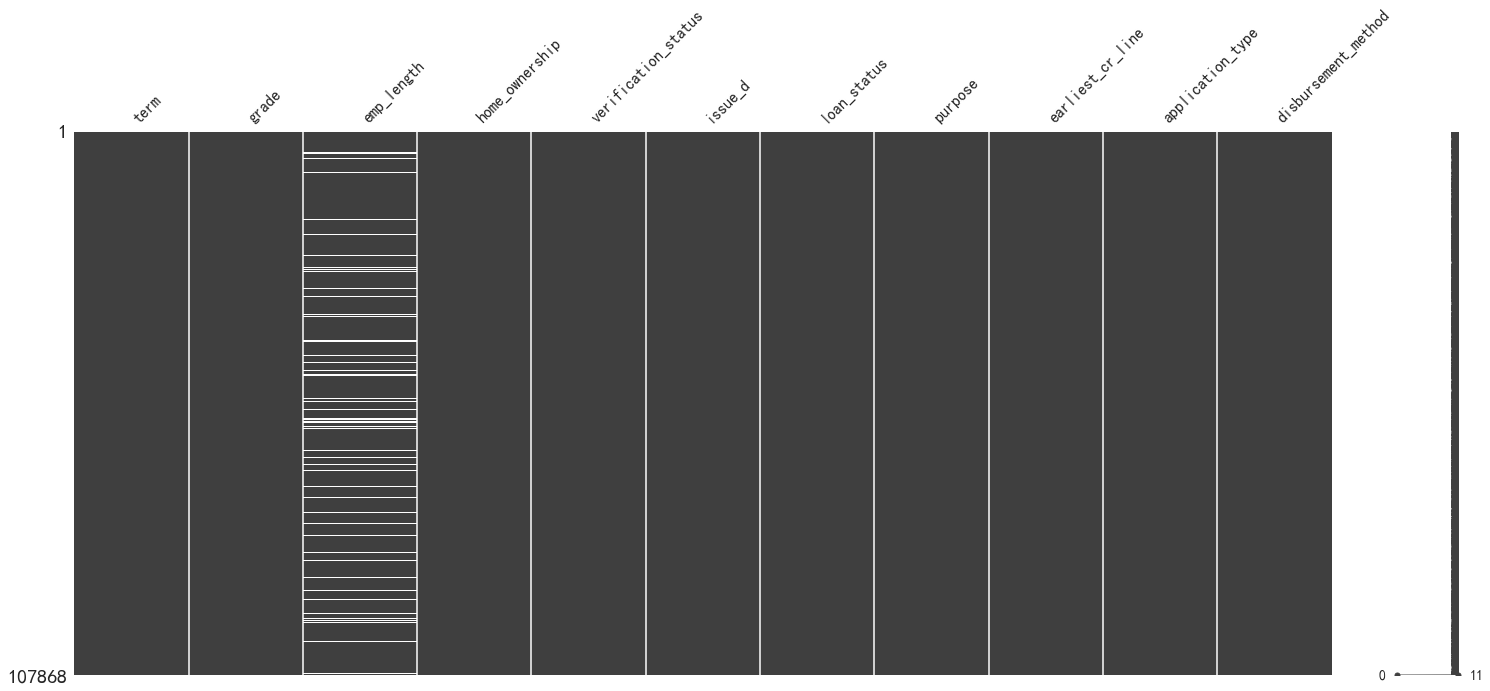

In [72]:
msno.matrix(loans[objectColumns])

上图直观看出变量emp_length,next_pymnt_d缺失值较多，同时图右边反应了第21行缺失值最多，第0行最少。

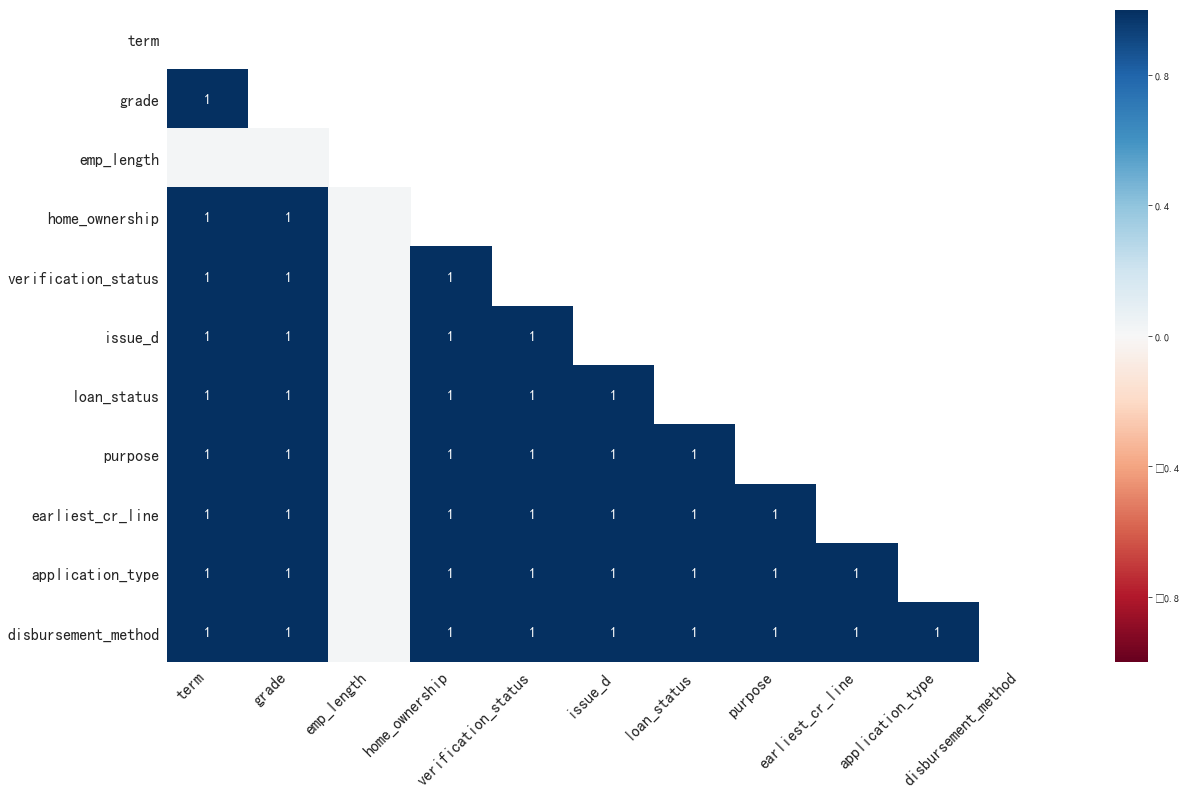

In [73]:
msno.heatmap(loans[objectColumns])

上图显示了缺失值之间的相关性，当相关性为0时，说明两个变量之间没有影响，相关性为1或-1说明变量间呈现正相关或负相关。

这个热图对选择变量之间的数据完整性关系非常有用，但对于大数据不太友好。

我们用pandas.fillna()处理文本变量缺失，为分类变量创建一个分类Unknown.

In [74]:
objectColumns = loans.select_dtypes(include=['object']).columns
loans[objectColumns] = loans[objectColumns].fillna('Unknown')

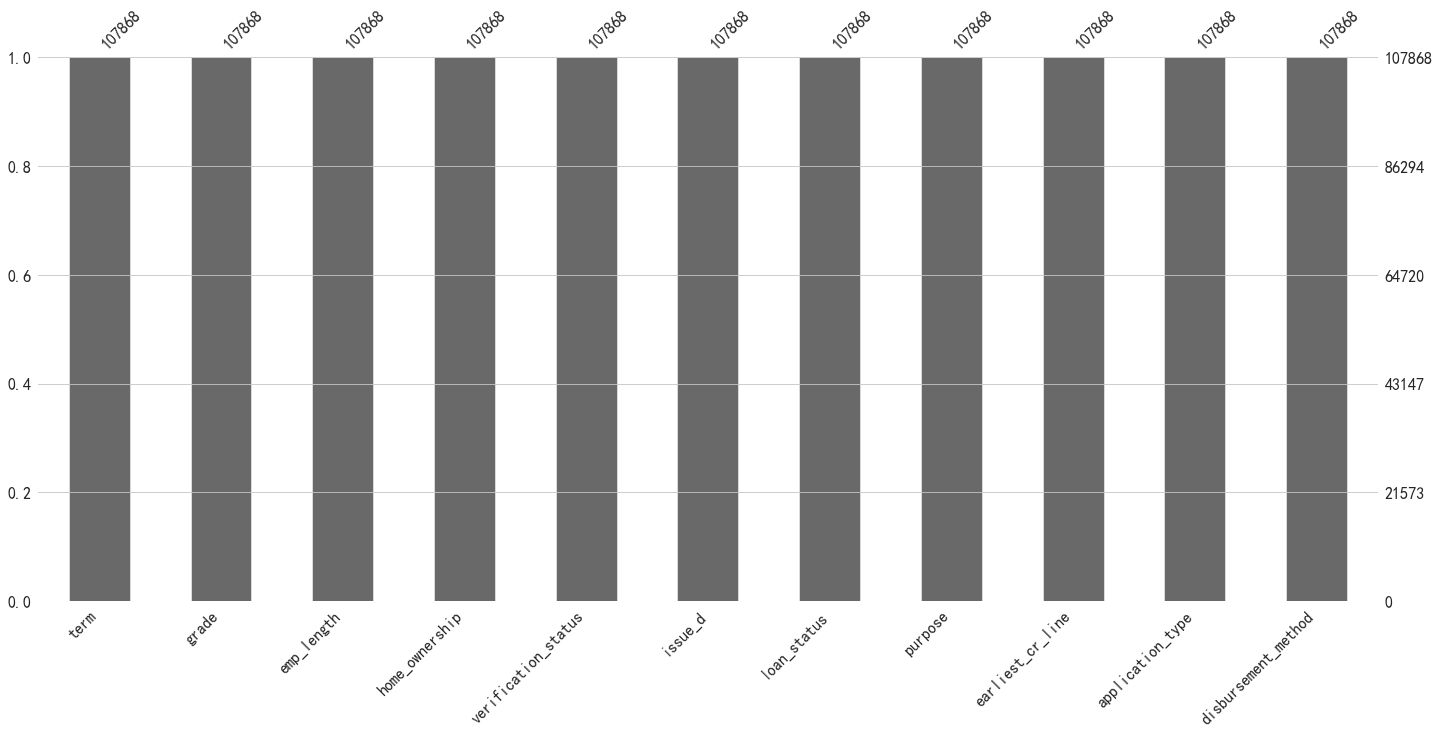

In [75]:
msno.bar(loans[objectColumns])

+ 缺失值处理--数值型变量

查看数值型变量的缺失值情况。

In [76]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

il_util                       17988
mths_since_recent_inq         13652
mo_sin_old_il_acct             4292
mths_since_rcnt_il             4292
bc_util                        1565
percent_bc_gt_75               1518
bc_open_to_buy                 1514
mths_since_recent_bc           1425
dti                             266
revol_util                      153
all_util                         32
avg_cur_bal                      14
pct_tl_nvr_dlq                    5
open_rv_12m                       4
open_il_12m                       4
total_bal_il                      4
open_il_24m                       4
max_bal_bc                        4
open_rv_24m                       4
open_acc_6m                       4
open_act_il                       4
inq_fi                            4
tot_cur_bal                       4
tot_coll_amt                      4
total_acc                         4
revol_bal                         4
pub_rec                           4
open_acc                    

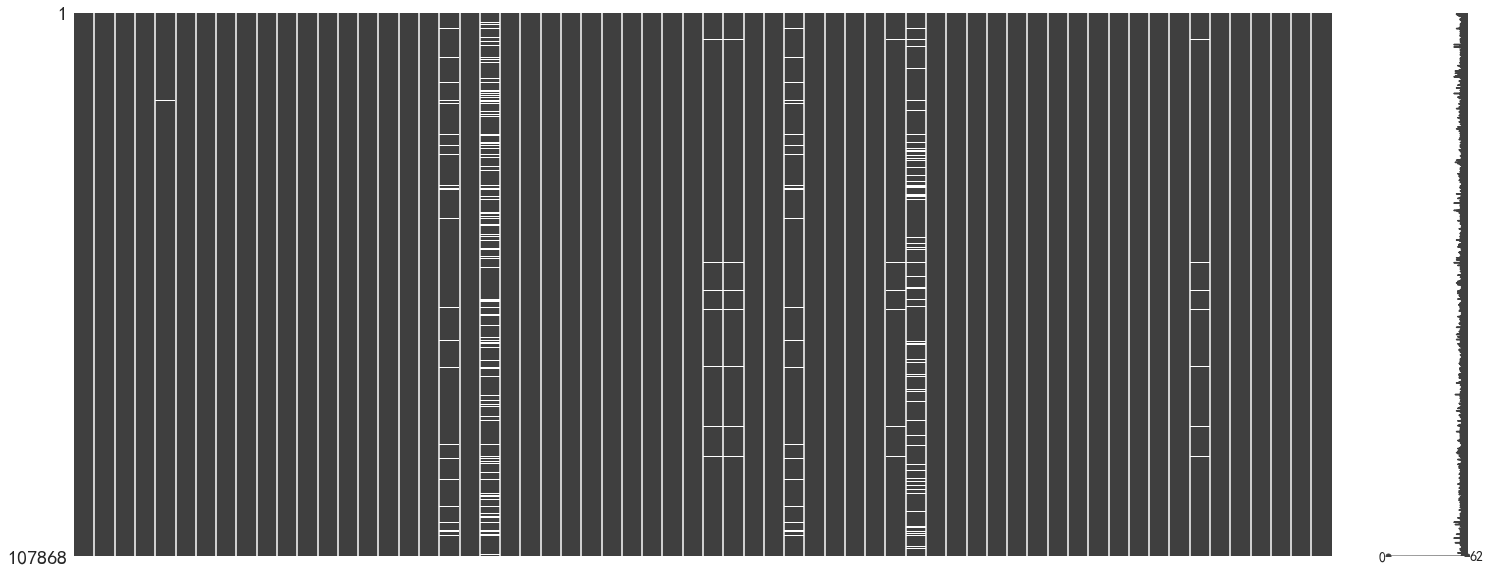

In [77]:
numColumns = loans.select_dtypes(include=[np.number]).columns
msno.matrix(loans[numColumns])

In [78]:
pd.set_option('display.max_columns',len(loans.columns))
loans[numColumns]

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,18500.00000,13.58000,628.52000,82985.00000,18.66000,1.00000,0.00000,22.00000,1.00000,13970.00000,35.10000,44.00000,1333.00000,53116.00000,1.00000,3.00000,0.00000,1.00000,16.00000,39146.00000,64.00000,1.00000,4.00000,4294.00000,53.00000,39800.00000,1.00000,0.00000,1.00000,5.00000,2951.00000,16314.00000,40.50000,0.00000,0.00000,141.00000,167.00000,0.00000,0.00000,2.00000,0.00000,1.00000,0.00000,5.00000,10.00000,7.00000,12.00000,6.00000,19.00000,36.00000,10.00000,22.00000,0.00000,1.00000,95.50000,0.00000,1.00000,0.00000,100830.00000,53116.00000,27400.00000,61030.00000
1,7000.00000,7.34000,217.23000,180700.00000,18.98000,1.00000,1.00000,13.00000,0.00000,10546.00000,36.90000,17.00000,696.00000,286553.00000,1.00000,4.00000,0.00000,1.00000,24.00000,49674.00000,15.00000,2.00000,2.00000,4492.00000,33.00000,28600.00000,0.00000,0.00000,2.00000,3.00000,22043.00000,8787.00000,50.90000,0.00000,0.00000,97.00000,165.00000,3.00000,3.00000,1.00000,89.00000,3.00000,0.00000,3.00000,5.00000,4.00000,5.00000,7.00000,7.00000,8.00000,5.00000,13.00000,0.00000,2.00000,94.10000,0.00000,0.00000,0.00000,410809.00000,67331.00000,17900.00000,129270.00000
2,16000.00000,11.98000,355.75000,95000.00000,11.79000,0.00000,1.00000,11.00000,0.00000,10481.00000,41.30000,24.00000,0.00000,149865.00000,2.00000,2.00000,0.00000,1.00000,20.00000,9524.00000,42.00000,3.00000,4.00000,5959.00000,41.00000,25400.00000,1.00000,1.00000,2.00000,5.00000,13624.00000,6494.00000,51.20000,0.00000,0.00000,263.00000,110.00000,1.00000,1.00000,1.00000,4.00000,1.00000,0.00000,2.00000,4.00000,3.00000,3.00000,12.00000,8.00000,11.00000,4.00000,11.00000,0.00000,3.00000,95.80000,33.30000,0.00000,0.00000,195926.00000,20005.00000,13300.00000,22864.00000
3,28000.00000,10.90000,915.36000,103000.00000,30.76000,0.00000,0.00000,12.00000,0.00000,21266.00000,26.50000,30.00000,0.00000,76475.00000,3.00000,3.00000,2.00000,3.00000,4.00000,55209.00000,91.00000,1.00000,3.00000,10750.00000,41.00000,80300.00000,0.00000,0.00000,0.00000,6.00000,6373.00000,59034.00000,26.50000,0.00000,0.00000,134.00000,184.00000,2.00000,2.00000,1.00000,2.00000,nan,1.00000,4.00000,4.00000,9.00000,15.00000,12.00000,9.00000,17.00000,4.00000,12.00000,0.00000,3.00000,96.70000,11.10000,0.00000,0.00000,153679.00000,76475.00000,80300.00000,73379.00000
4,8300.00000,7.34000,257.58000,40000.00000,30.84000,0.00000,1.00000,16.00000,0.00000,8507.00000,50.90000,27.00000,0.00000,213693.00000,2.00000,8.00000,0.00000,1.00000,24.00000,40129.00000,75.00000,2.00000,3.00000,5134.00000,69.00000,16700.00000,0.00000,5.00000,1.00000,5.00000,13356.00000,5981.00000,50.20000,0.00000,0.00000,127.00000,121.00000,3.00000,3.00000,1.00000,24.00000,4.00000,0.00000,2.00000,3.00000,3.00000,4.00000,18.00000,7.00000,8.00000,3.00000,16.00000,0.00000,3.00000,100.00000,33.30000,0.00000,0.00000,237274.00000,48636.00000,12000.00000,53654.00000
5,6000.00000,6.07000,182.73000,42000.00000,18.47000,0.00000,0.00000,7.00000,0.00000,4815.00000,23.80000,12.00000,0.00000,36467.00000,2.00000,1.00000,1.00000,1.00000,6.00000,31652.00000,95.00000,2.00000,4.00000,2573.00000,68.00000,20200.00000,1.00000,2.00000,2.00000,5.00000,5210.00000

可知最后四行的属性值都是nan，这些空行对我们的模型没有任何意义，在此先单独删除这些行。

In [79]:
loans.drop([107864,107865,107866,107867],inplace=True)
loans[numColumns].tail()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
107859,5000.00000,12.62000,167.56000,56000.00000,35.50000,0.00000,0.00000,14.00000,2.00000,13530.00000,86.20000,37.00000,0.00000,25414.00000,0.00000,3.00000,0.00000,2.00000,14.00000,11884.00000,35.00000,2.00000,4.00000,5200.00000,51.00000,15700.00000,1.00000,2.00000,0.00000,6.00000,2118.00000,953.00000,93.20000,0.00000,0.00000,166.00000,271.00000,7.00000,7.00000,3.00000,7.00000,15.00000,1.00000,7.00000,8.00000,7.00000,14.00000,9.00000,11.00000,25.00000,8.00000,14.00000,0.00000,2.00000,86.50000,100.00000,0.00000,2.00000,50010.00000,25414.00000,14000.00000,34310.00000
107860,6000.00000,10.91000,196.18000,50000.00000,28.93000,0.00000,0.00000,11.00000,0.00000,6950.00000,51.90000,14.00000,0.00000,230614.00000,0.00000,1.00000,1.00000,1.00000,9.00000,18497.00000,83.00000,1.00000,1.00000,2257.00000,71.00000,13400.00000,1.00000,0.00000,2.00000,2.00000,20965.00000,5850.00000,54.30000,0.00000,0.00000,9.00000,246.00000,7.00000,7.00000,2.00000,45.00000,7.00000,1.00000,8.00000,8.00000,8.00000,9.00000,1.00000,9.00000,11.00000,8.00000,11.00000,0.00000,2.00000,78.60000,12.50000,0.00000,0.00000,275650.00000,25447.00000,12800.00000,22250.00000
107861,4375.00000,14.08000,149.70000,52000.00000,33.72000,0.00000,0.00000,22.00000,0.00000,28116.00000,49.20000,41.00000,249.00000,217780.00000,1.00000,2.00000,0.00000,2.00000,18.00000,22184.00000,66.00000,1.00000,3.00000,6844.00000,56.00000,57200.00000,3.00000,0.00000,0.00000,5.00000,9899.00000,17696.00000,52.70000,0.00000,0.00000,122.00000,286.00000,1.00000,1.00000,3.00000,1.00000,17.00000,0.00000,5.00000,10.00000,7.00000,14.00000,4.00000,19.00000,34.00000,10.00000,22.00000,0.00000,1.00000,100.00000,42.90000,0.00000,0.00000,274690.00000,50300.00000,37400.00000,33419.00000
107862,12000.00000,10.42000,389.58000,36000.00000,11.10000,1.00000,0.00000,14.00000,0.00000,11648.00000,43.60000,18.00000,0.00000,191131.00000,2.00000,1.00000,0.00000,0.00000,115.00000,105786.00000,nan,3.00000,6.00000,3662.00000,44.00000,26700.00000,1.00000,0.00000,1.00000,6.00000,14702.00000,7510.00000,46.00000,0.00000,0.00000,185.00000,235.00000,0.00000,0.00000,1.00000,15.00000,11.00000,1.00000,3.00000,6.00000,4.00000,4.00000,5.00000,12.00000,12.00000,6.00000,14.00000,1.00000,3.00000,94.10000,50.00000,0.00000,0.00000,172918.00000,117434.00000,13900.00000,60818.00000
107863,14000.00000,13.59000,475.71000,80000.00000,1.35000,0.00000,1.00000,11.00000,0.00000,1461.00000,4.10000,21.00000,0.00000,1461.00000,1.00000,0.00000,0.00000,1.00000,17.00000,0.00000,nan,1.00000,2.00000,1406.00000,4.00000,35300.00000,2.00000,0.00000,2.00000,3.00000,162.00000,28839.00000,4.80000,0.00000,0.00000,52.00000,125.00000,3.00000,3.00000,0.00000,3.00000,0.00000,5.00000,4.00000,4.00000,8.00000,14.00000,2.00000,11.00000,19.00000,4.00000,11.00000,0.00000,1.00000,75.00000,0.00000,0.00000,0.00000,35300.00000,1461.00000,30300.00000,0.00000


对于数值型变量的缺失值，我们用均值插补的方法来填充缺失值，这里可以用sklearn的Preprocessing模块，参数strategy值有median，most_frequence，mean等

In [80]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN',strategy='mean',axis=0)
imr = imr.fit(loans[numColumns])
loans[numColumns] = imr.transform(loans[numColumns])

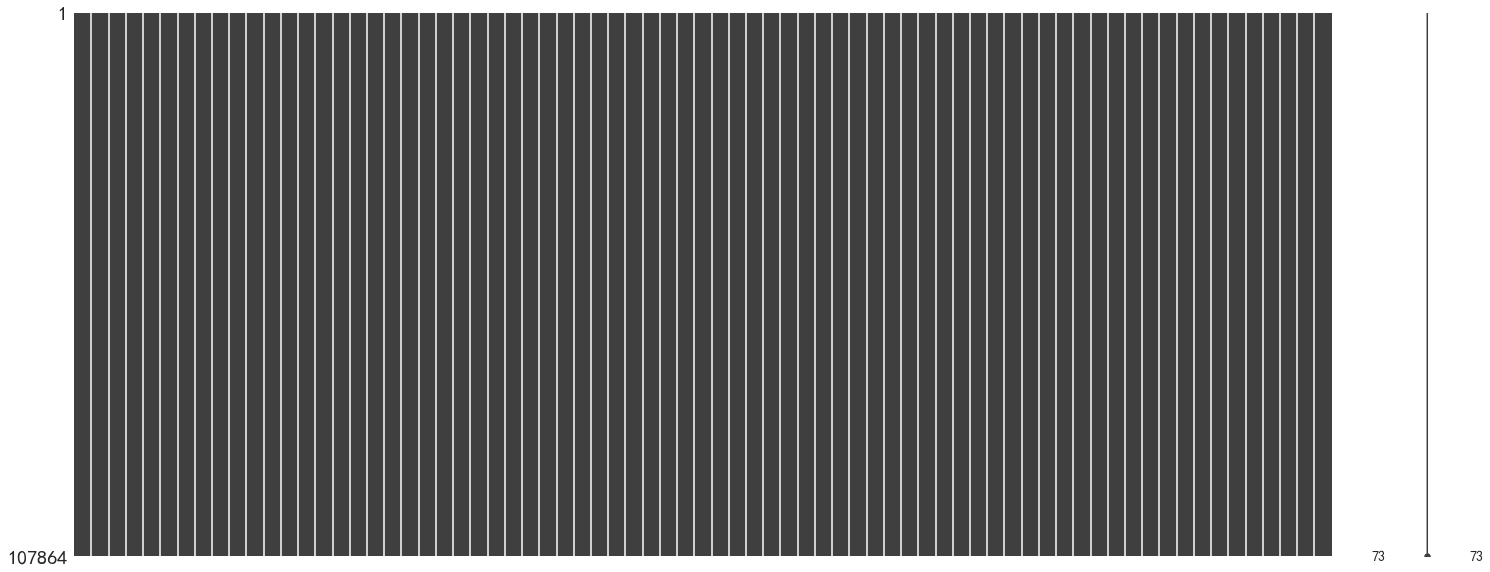

In [81]:
msno.matrix(loans)

不同算法需要不同数据类型建立。例如逻辑回归只支持数值型变量，所以我们要对数据进行进一次转换。

# 5.特征工程

特征工程是个反复迭代的过程，大部分时间都是这分析业务、分析case，不断的找特征。更好的特征意味着只需用简单的模型就能预测更好的结果。

本次特征工程分为四个部分。

## 5.1 特征衍生

特征衍生是指利用现有的特征进行某种组合生成新的特征。

例如Lending Club平台中，"installment"代表贷款每月分期的金额，我们将'annual_inc'除以12个月获得贷款申请人的月收入金额，然后再把"installment"（月负债）与（'annual_inc'/12）（月收入）相除生成新的特征'installment_feat'，新特征'installment_feat'代表客户每月还款支出占月收入的比，'installment_feat'的值越大，意味着贷款人的偿债压力越大，违约的可能性越大。因为'annual_inc'有零值，所以'installment_feat'会出现无穷大值，为了后续方便计算，我们将无穷大值替换为'installment_feat'中的最大值*10。

In [82]:
loans['installment_feat'] = loans['installment']/(loans['annual_inc']/12)

In [83]:
ins_max = loans['installment_feat'][loans['installment_feat']!=np.inf].max()*10
ins_max

120534.00000000001

In [84]:
loans['installment_feat'].replace(np.inf,ins_max,inplace=True)
loans['installment_feat'].max()

#import math
#inf_loc = loans['installment_feat'].apply(math.inf)
#loans['installment_feat'][inf_loc]=ins_max

120534.00000000001

我们将借贷时间‘issue_d’减去首次开卡时间‘earliest_cr_line’建立一个特征'mth_interval',‘issue_d’建立一个新特征，并删去这两个特征

In [85]:
loans['issue_d'] = loans['issue_d'] .apply(lambda x:pd.datetime.strptime(x,'%b-%y'))

In [86]:
loans['earliest_cr_line'] = loans['earliest_cr_line'] .apply(lambda x:pd.datetime.strptime(x,'%b-%y'))

In [87]:
loans['mth_interval']=loans['issue_d']-loans['earliest_cr_line']
loans['mth_interval']=loans['mth_interval'].apply(lambda x: round(x.days/30,0))
loans['issue_m']=loans['issue_d'].apply(lambda x: x.month)
loans=loans.drop(['issue_d','earliest_cr_line'],axis=1)

## 5.2 特征抽象

特征抽象指将数据转换成算法可以理解的数据

In [88]:
# 将贷款状态LoanStatus编码为违约=1，正常=0
codeDict={'Current':0,'Fully Paid':0,'Late (31-120 days)':1,'In Grace Period':1,'Late (16-30 days)':1,'Charged Off':1,'Default':1}
loans['loan_status'] = loans['loan_status'].map(codeDict)

print('After coding:')
pd.value_counts(loans['loan_status'])

After coding:


0    105804
1      2060
Name: loan_status, dtype: int64

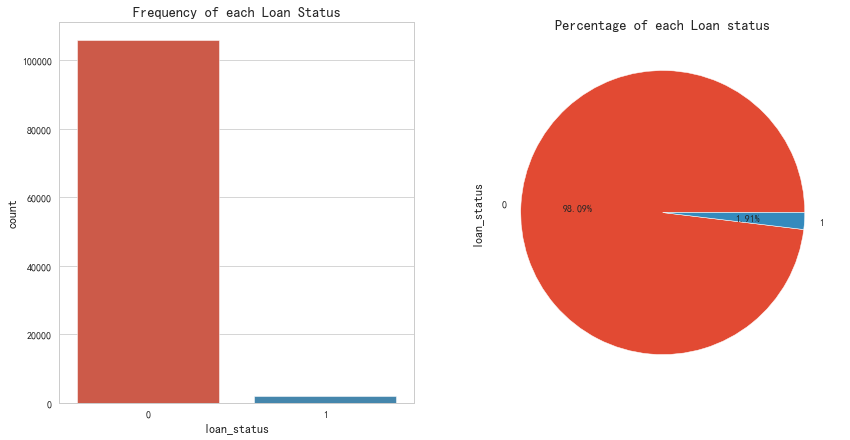

In [89]:
# 贷款状态分布可视化

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

由上图值贷款状态作为我们的建模标签时，贷款状态的值分布不均衡，所以我们得做处理

In [90]:
object_col_df = loans.select_dtypes(include=['object'])
print(object_col_df.iloc[0])

term                          36 months
grade                                 C
emp_length                      6 years
home_ownership                 MORTGAGE
verification_status        Not Verified
purpose                home_improvement
application_type             Individual
disbursement_method                Cash
Name: 0, dtype: object


+ 多值有序变量（Ordinal Values）

多值有序变量也称顺序数据（rank data），有序多值变量是某一有序类别的非数字型数据。有序多值变量虽然是类别，但这些类别是有序的。比如将产品分为一等品、二等品、三等品、次品等；Lending Club对贷款申请者信用等级分类——A至G，相应地按照不同信用等级匹配贷款利率——等级为A的客户信用评分比等级为B的客户好。

A <B <C < D < E < F < G ; 信用风险从低到高排序

+ 多值无序变量（Nominal Values）

多值无序变量又称分类数据（categorical data），多值无序变量是某一类别的非数字型数据。它是对事物进行分类的结果，数据表现为类别，是用文字表述的。例如，借款人按照性别分为男、女两类；分类数据中的分类是无序的，意味着我们并不能像多值有序变量那样将多值无序变量（“purpose”）进行排序。

car < wedding < education < moving < house；这种排序不符合常识，也没有任何意义
在此，我们对分类变量进一步细分。

####  多值有序变量
+ grade
+ emp_length

#### 多值无序变量
+ term
+ home_ownership
+ verification_status
+ pupose
+ application_type
+ disbursement_method

对不同分类变量的转换需要使用不同的操作方法进行处理

1. 有序特征的映射 

首先，我们对变量“emp_length”、"grade"进行特征抽象化，使用的方法是先构建一个mapping，再用pandas的replace( )进行映射转换

In [91]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "Unknown": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict) #变量映射
loans[['emp_length','grade']].head() #查看效果

,emp_length,grade
0,6,3
1,10,1
2,5,2
3,6,2
4,4,1


2. 独热编码

接下来，对多值无序变量进行独热编码（one-hot encoding）。
我们使用pandas的get_dummies( )方法创建虚拟特征，虚拟特征的每一列各代表变量属性的一个分类。然后再使用pandas的concat()方法将新建虚拟特征和原数据进行拼接。

In [92]:
n_columns = ["home_ownership", "verification_status", "application_type","purpose", "term","disbursement_method"] 
dummy_df = pd.get_dummies(loans[n_columns])# 用get_dummies进行one hot编码
loans = pd.concat([loans, dummy_df], axis=1) #当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并

In [93]:
loans.loc[:,loans.columns.str.contains("home_ownership")].head() #筛选包含home_ownership的所有变量

,home_ownership,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT
0,MORTGAGE,0,1,0,0
1,MORTGAGE,0,1,0,0
2,MORTGAGE,0,1,0,0
3,MORTGAGE,0,1,0,0
4,MORTGAGE,0,1,0,0


In [94]:
loans = loans.drop(n_columns, axis=1)  #清除原来的分类变量

In [95]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107864 entries, 0 to 107863
Data columns (total 94 columns):
loan_amnt                              107864 non-null float64
int_rate                               107864 non-null float64
installment                            107864 non-null float64
grade                                  107864 non-null int64
emp_length                             107864 non-null int64
annual_inc                             107864 non-null float64
loan_status                            107864 non-null int64
dti                                    107864 non-null float64
delinq_2yrs                            107864 non-null float64
inq_last_6mths                         107864 non-null float64
open_acc                               107864 non-null float64
pub_rec                                107864 non-null float64
revol_bal                              107864 non-null float64
revol_util                             107864 non-null float64
total_acc    

## 5.3 特征缩放（peature scaling）
特征缩放（peature scaling）是指将变量数据经过处理之后限定到一定的范围之内。特征缩放本质是一个去量纲的过程，同时可以加快算法收敛的速度。目前，将不同变量缩放到相同的区间有两个常用的方法：归一化（normalization）和标准化（standardization）。



In [96]:
col = loans.select_dtypes(include=['int64','float64']).columns
len(col)
out:78 #78个特征
col = col.drop('loan_status') #剔除目标变量
loans_ml_df = loans # 复制数据至变量loans_ml_df
###################################################################################
from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) #对数据进行标准化
loans_ml_df.head() #查看经标准化后的数据

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,installment_feat,mth_interval,issue_m,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_Individual,application_type_Joint App,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,disbursement_method_Cash,disbursement_method_DirectPay
0,0.23096,0.23064,0.54925,0.48834,0.14881,0.05779,0,-0.04539,1.06272,-0.61819,1.80680,1.69112,-0.09575,-0.32918,1.77781,0.04190,-0.54081,0.08472,0.11753,-0.71060,-0.32319,-0.21929,0.10311,-0.16363,-0.15029,0.55331,-0.27545,-0.02546,0.03941,-0.03074,-0.55395,-0.40240,0.19529,-0.62524,0.04418,-0.29769,...,-0.93659,2.61229,-0.11100,-0.44722,0.04210,0.01713,0.33776,-0.04858,-0.28214,1.17180,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,-0.89827,-1.01653,-0.87280,-1.24577,1.17367,1.32890,0,-0.03070,1.06272,0.72202,0.27602,-0.32992,-0.25015,-0.25755,-0.46711,0.01623,0.85190,0.08472,0.45880,-0.71060,-0.32319,0.08830,0.33984,-2.38716,0.52812,-0.23789,-0.24003,-0.95789,-0.26564,-0.69974,-0.55395,0.01906,-0.43145,0.46657,-0.33810,0.06133,...,-0.93659,-0.36968,-0.11100,1.19577,0.31596,-0.35069,1.78141,-0.04860,-0.30184,1.17180,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,-0.01453,-0.08915,-0.39386,-0.37871,-0.10740,0.21409,0,-0.36098,-0.30636,0.72202,-0.06415,-0.32992,-0.25308,-0.08248,0.11491,-0.01182,0.03640,0.97589,-0.22374,-0.71060,-0.32319,-0.06550,-0.56296,-1.16195,1.20652,0.55331,0.02243,-0.58492,-0.35280,-0.03074,-0.17413,0.01906,0.19529,-0.01488,-0.45456,0.07169,...,0.02441,-0.36968,-0.11100,0.05682,-0.59578,-0.52880,-0.46966,-0.04859,0.68334,1.17180,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1.16379,-0.30500,1.54100,-0.37871,0.14881,0.31815,0,0.51043,-0.30636,-0.61819,0.10594,-0.32992,0.23325,-0.67137,0.61378,-0.01182,-0.40145,1.86706,0.11753,1.48175,0.98270,-0.68068,0.46430,1.06157,-0.15029,0.15771,0.87957,-0.58492,1.14251,-0.69974,-0.55395,-0.82385,0.50865,-0.42955,2.21387,-0.78099,...,-0.61626,-0.36968,-0.11100,-0.16711,0.49212,2.06531,0.59901,-0.04858,-0.02599,1.17180,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,-0.77062,-1.01653,-0.73329,-1.24577,-0.36362,-0.50137,0,0.51411,-0.30636,0.72202,0.78628,-0.32992,-0.34210,0.29951,0.36434,-0.01182,0.41721,0.97589,1.82390,-0.71060,-0.32319,0.08830,0.12521,0.33552,0.52812,0.15771,-0.12517,0.72048,-0.58977,-0.69974,1.34514,-0.40240,0.19529,-0.03021,-0.48062,0.03717,...,0.02441,-0.36968,-0.11100,0.27598,-0.04420,-0.57913,0.18171,-0.04859,-0.67621,1.17180,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## 5.4 特征选择 

通常来说，对特征集合做选择主要有2个原因：首先，优先选择与目标相关性较高的特征，不相关特征包含对于数据挖掘任务完全没用的信息，不相关特征可能会降低分类的准确率，因此为了增强模型的泛化能力，我们需要从原有特征集合中挑选出最佳的部分特征。其次，去除不相关特征可以降低学习的难度（less is more），能够简化分类器的计算，同时帮助了解分类问题的因果关系。

一般来说，根据特征选择的思路将特征选择分为3种方法：嵌入方法（embedded approach）、过滤方法（filter approach）、包装方法（wrapper approacch）。

+ 过滤方法（filter approach）: 通过自变量之间或自变量与目标变量之间的关联关系选择特征。
+ 嵌入方法（embedded approach）: 通过学习器自身自动选择特征。
+ 包装方法（wrapper approacch）: 通过目标函数（AUC/MSE）来决定是否加入一个变量。


In [97]:
from sklearn.model_selection import train_test_split
x_feature = list(loans.columns)
x_feature.remove('loan_status')
x_val = loans[x_feature]
y_val = loans['loan_status']
x_val_train,x_val_test,y_val_train,y_val_test = train_test_split(x_val,y_val,test_size=0.3,random_state=0)
len(x_feature)

93

In [98]:
x_val.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,107864.00000,-0.00000,1.00000,-1.48743,-0.80007,-0.21091,0.61391,2.34212
int_rate,107864.00000,0.00000,1.00000,-1.42226,-0.59881,-0.08915,0.52444,3.71031
installment,107864.00000,-0.00000,1.00000,-1.51973,-0.74373,-0.27765,0.58147,3.97050
grade,107864.00000,0.00000,1.00000,-1.24577,-0.37871,-0.37871,0.48834,3.95657
emp_length,107864.00000,-0.00000,1.00000,-1.38848,-0.87605,-0.10740,1.17367,1.17367
annual_inc,107864.00000,-0.00000,1.00000,-1.02170,-0.43633,-0.17616,0.21409,107.79516
dti,107864.00000,-0.00000,1.00000,-0.90256,-0.38578,-0.08995,0.24584,44.98772
delinq_2yrs,107864.00000,-0.00000,1.00000,-0.30636,-0.30636,-0.30636,-0.30636,27.07540
inq_last_6mths,107864.00000,0.00000,1.00000,-0.61819,-0.61819,-0.61819,0.72202,6.08287
open_acc,107864.00000,0.00000,1.00000,-1.93510,-0.74449,-0.23423,0.44611,9.80087


### 5.4.1 递归特征消除 
首先，选出与目标变量相关性较高的特征。这里采用的是Wrapper方法，通过暴力的递归特征消除 (Recursive Feature Elimination)方法筛选30个与目标变量相关性最强的特征，逐步剔除特征从而达到首次降维，自变量从104个降到30个。

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 30) #通过递归选择特征，选择30个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中

[False  True False  True False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False  True False
 False False False False  True  True False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
 False False False  True  True  True  True  True  True]
[ 7  1 53  1 26 58 13 35  1  1 10  9 56 60 62 31 29 15 30 49 44  4 25 21
 20 28  5 19 55 14 42 22 39  1 45 43 63 41 24 51 32 48 40 52 38 17  1 16
 33 27 34 61  1  1 57 23 47 46 12 11 64  8 54  3 59 50  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  1  6  1 36 37 18  1  1  1  1  1  1]


In [100]:
col_filter = x_val.columns[rfe.support_] #通过布尔值筛选首次降维后的变量
col_filter # 查看通过递归特征消除法筛选的变量q

Index(['int_rate', 'grade', 'inq_last_6mths', 'open_acc', 'bc_open_to_buy',
       'num_actv_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats', 'issue_m',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Individual', 'application_type_Joint App',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase', 'purpose_moving',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'disbursement_method_Cash',
       'disbursement_method_DirectPay'],
      dtype='object')

### 5.4.2 强相关性变量
首先，剩下的变量中有一些相关性较强，这些变量不利后面的操作，需要剔除。

In [117]:
corrMatrix = x_val[col_filter].corr()
upTri = np.triu(corrMatrix.as_matrix(),1)
absUptri=np.abs(upTri)
corrMatrix = pd.DataFrame(absUptri,columns=corrMatrix.columns)
colList = corrMatrix.apply(lambda x:all(x<=0.7))
col_filter_new = col_filter[colList]
loans[col_filter_new].shape

(107864, 23)

特征子集包含的变量降维至23个

In [118]:
col_filter_new

Index(['int_rate', 'inq_last_6mths', 'open_acc', 'bc_open_to_buy',
       'num_actv_rev_tl', 'issue_m', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Individual', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_moving', 'purpose_vacation',
       'purpose_wedding', 'term_ 36 months', 'disbursement_method_Cash'],
      dtype='object')

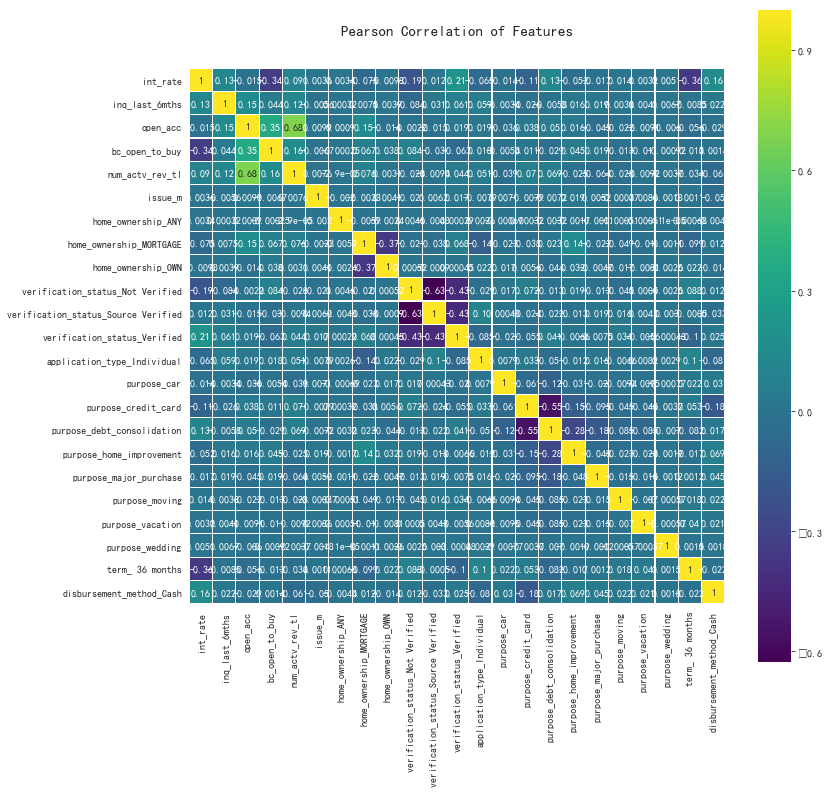

In [103]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans[col_filter_new].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### 5.4.3 随机森林过滤变量

很多时候我们需要了解每个特征对目标的影响程度，在特定的业务场景下，不同的特征权重对业务的决策带来不同的影响。例如，在Lending Club的业务数据中，能够反映借款人资产状况或现金流的特征都对我们构建预测违约贷款模型十分关键。因此，我们需要对特征的权重有一个正确的评判和排序，就可以通过特征重要性排序来挖掘哪些变量是比较重要的，降低学习难度，最终达到优化模型计算的目的。这里，我们采用的是随机森林算法判定特征的重要性，工程实现方式采用scikit-learn的featureimportances 的方法

In [119]:
names=loans[col_filter_new].columns
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10,random_state=123)
clf.fit(x_val_train[col_filter_new],y_val_train)
for feature in zip(names,clf.feature_importances_):
    print(feature)

('int_rate', 0.17412788338386914)
('inq_last_6mths', 0.042448786815630066)
('open_acc', 0.15499634293830308)
('bc_open_to_buy', 0.29971295508926715)
('num_actv_rev_tl', 0.11744806029490389)
('issue_m', 0.039865428108344876)
('home_ownership_ANY', 1.3193582996972827e-08)
('home_ownership_MORTGAGE', 0.013664675741073369)
('home_ownership_OWN', 0.01727532651046024)
('verification_status_Not Verified', 0.006642658778684202)
('verification_status_Source Verified', 0.01239984451624179)
('verification_status_Verified', 0.009253659672218062)
('application_type_Individual', 0.020707286840282974)
('purpose_car', 0.002536562315907105)
('purpose_credit_card', 0.010485610911625316)
('purpose_debt_consolidation', 0.02430805397934044)
('purpose_home_improvement', 0.011908871038605195)
('purpose_major_purchase', 0.0071544155856936706)
('purpose_moving', 0.003242490942805108)
('purpose_vacation', 0.0029679514284242053)
('purpose_wedding', 0.0005021423094349096)
('term_ 36 months', 0.023758195069027)
('

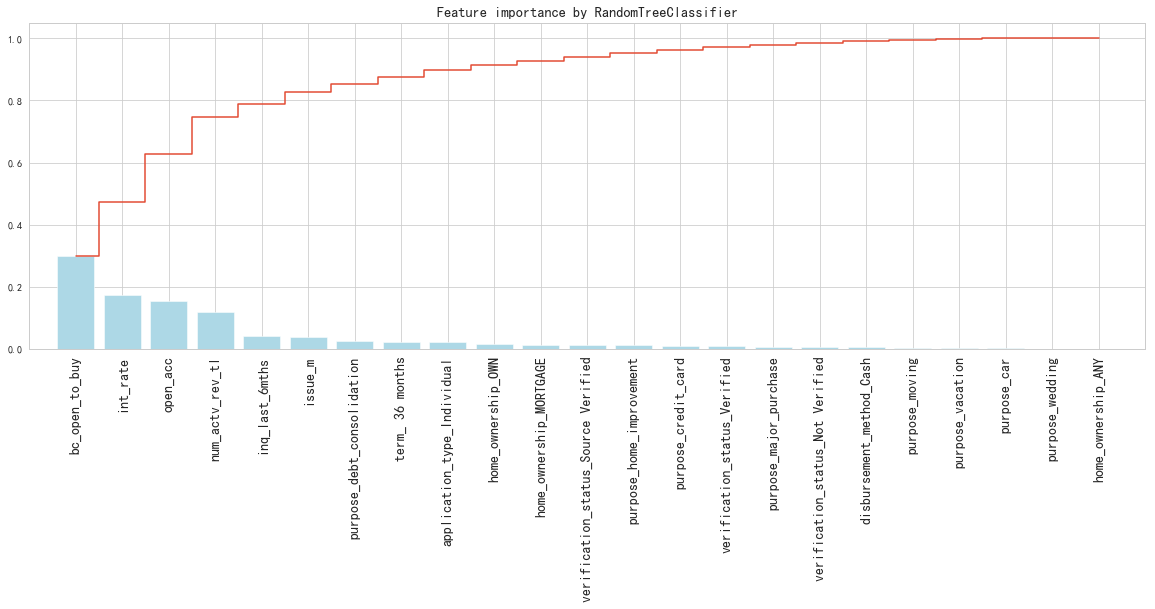

In [120]:
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title('Feature importance by RandomTreeClassifier')
plt.bar(range(len(indices)),importances[indices],color='lightblue',align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feat_names[indices],rotation='vertical',fontsize=14)
plt.xlim([-1,len(indices)])
plt.show()

上图是根据特征在特征子集中的相对重要性绘制的排序图，这些特征经过特征缩放后，其特征重要性的和为1.0。

In [122]:
col_filter_new = col_filter_new[importances>0.01]
len(col_filter_new)

14

## 6.模型训练

+ 处理样本不平衡

前面提到，目标变量“loans_status”正常和违约两种类别的数量差别较大，会对模型学习造成困扰。举例来说，假如有100个样本，其中只有1个是贷款违约样本，其余99个全为贷款正常样本，那么学习器只要制定一个简单的方法：所有样本均判别为正常样本，就能轻松达到99%的准确率。而这个分类器的决策对我们的风险控制毫无意义。因此，在将数据代入模型训练之前，我们必须先解决样本不平衡的问题。

非平衡样本常用的解决方式有2种：1、过采样（oversampling），增加正样本使得正、负样本数目接近，然后再进行学习。2、欠采样（undersampling），去除一些负样本使得正、负样本数目接近，然后再进行学习。

本次处理样本不平衡采用的方法是过采样，具体操作使用SMOTE（Synthetic Minority Oversampling Technique），SMOET的基本原理是：采样最邻近算法，计算出每个少数类样本的K个近邻，从K个近邻中随机挑选N个样本进行随机线性插值，构造新的少数样本，同时将新样本与原数据合成，产生新的训练集。

In [123]:
X = loans[col_filter_new]
y = loans['loan_status']

n_sample = y.shape[0]
n_pos_sample = y[y==0].shape[0]
n_neg_sample = y[y==1].shape[0]

print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('特征维数：', X.shape[1])

样本个数：107864; 正样本占98.09%; 负样本占1.91%
特征维数： 14


In [124]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,y = sm.fit_sample(X,y)
print('通过SMOTE方法平衡正负样本后')
n_sample = y.shape[0]
n_pos_sample = y[y==0].shape[0]
n_neg_sample = y[y==1].shape[0]

print('样本个数：{}; 正样本占{:.2%}; 负样本占{:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

通过SMOTE方法平衡正负样本后
样本个数：211608; 正样本占50.00%; 负样本占50.00%


## 6 建立模型以及模型优化

通常来说，将数据集划分为训练集和测试集有3种处理方法：1、留出法（hold-out），2、交叉验证法（cross-validation），3、自助法（bootstrapping）

本次项目我们采用交叉验证法划分数据集，将数据划分为3部分：训练集（training set）、验证集（validation set）和测试集（test set）。让模型在训练集进行学习，在验证集上进行参数调优，最后使用测试集数据评估模型的性能。

模型调优我们采用网格搜索调优参数（grid search），通过构建参数候选集合，然后网格搜索会穷举各种参数组合，根据设定评定的评分机制找到最好的那一组设置。

结合cross-validation和grid search，具体操作我们采用scikit learn模块model_selection中的GridSearchCV方法。

In [125]:
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000,],
                            'penalty': [ 'l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=10)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.78775,0.11414,0.00209,0.00054,0.01000,l1,"{'C': 0.01, 'penalty': 'l1'}",0.65780,0.65490,0.65915,0.65226,0.65807,0.65760,0.65611,0.65548,0.65451,0.65789,0.65638,0.00200,1
1,0.74268,0.02182,0.00229,0.00090,0.01000,l2,"{'C': 0.01, 'penalty': 'l2'}",0.65719,0.65368,0.65733,0.65287,0.65929,0.65699,0.65611,0.65616,0.65620,0.65775,0.65636,0.00179,2
2,0.87730,0.06543,0.00229,0.00065,0.10000,l1,"{'C': 0.1, 'penalty': 'l1'}",0.65773,0.65368,0.65753,0.65226,0.65834,0.65625,0.65483,0.65622,0.65600,0.65769,0.65605,0.00186,3
3,0.72898,0.04746,0.00190,0.00054,0.10000,l2,"{'C': 0.1, 'penalty': 'l2'}",0.65740,0.65362,0.65726,0.65233,0.65854,0.65638,0.65476,0.65582,0.65600,0.65742,0.65595,0.00181,4
4,0.92817,0.12036,0.00190,0.00054,1,l1,"{'C': 1, 'penalty': 'l1'}",0.65746,0.65348,0.65753,0.65213,0.65841,0.65618,0.65429,0.65575,0.65593,0.65755,0.65587,0.00192,5
5,0.71299,0.01310,0.00220,0.00040,1,l2,"{'C': 1, 'penalty': 'l2'}",0.65740,0.65321,0.65760,0.65213,0.65848,0.65618,0.65422,0.65575,0.65600,0.65748,0.65584,0.00196,11
6,0.95185,0.10631,0.00180,0.00040,10,l1,"{'C': 10, 'penalty': 'l1'}",0.65740,0.65328,0.65760,0.65213,0.65854,0.65611,0.65436,0.65575,0.65593,0.65742,0.65585,0.00195,9
7,0.71209,0.02143,0.00200,0.00001,10,l2,"{'C': 10, 'penalty': 'l2'}",0.65746,0.65321,0.65760,0.65213,0.65854,0.65618,0.65436,0.65575,0.65600,0.65742,0.65586,0.00196,8
8,0.87770,0.06567,0.00229,0.00090,100,l1,"{'C': 100, 'penalty': 'l1'}",0.65740,0.65321,0.65760,0.65213,0.65854,0.65618,0.65436,0.65575,0.65593,0.65742,0.65585,0.00196,9
9,0.72619,0.04893,0.00179,0.00040,100,l2,"{'C': 100, 'penalty': 'l2'}",0.65746,0.65321,0.65760,0.65213,0.65854,0.65625,0.65436,0.65575,0.65600,0.65742,0.65587,0.00196,5


In [127]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('最佳参数',best_params)
print('最佳得分',best_score)

最佳参数 {'C': 0.01, 'penalty': 'l1'}
最佳得分 0.65637805907173


[Text(0, 0.5, 'l1'), Text(0, 1.5, 'l2')]

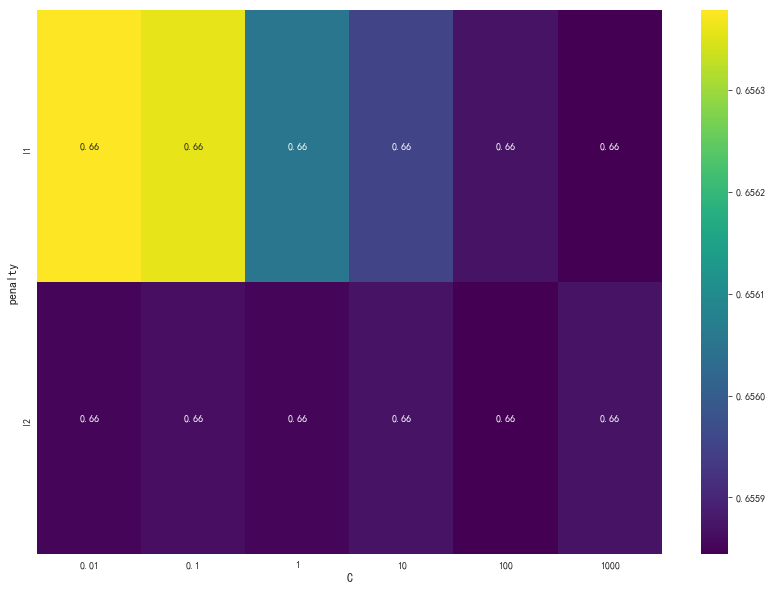

In [128]:
f, ax = plt.subplots(figsize = (14, 10))
scores = np.array(results.mean_test_score).reshape(2, 6)
sns.heatmap(scores,cmap='viridis',annot=True,vmax=results['mean_test_score'].max(),vmin=results['mean_test_score'].min())
ax.set_xlabel('C')
ax.set_xticklabels(param_grid['C'])
ax.set_ylabel('penalty')
ax.set_yticklabels(param_grid['penalty'])

上图模型在不同参数组合下跑出的分数热力图，我们可以从热力图明显看出，l2比l1的表现普遍要好，当C小于1时，模型表现较差。同时，我可以利用热力图来寻找参数调优的方向，进一步选择更优的参数。而实际操作中，模型调参是一个反复迭代的过程。

In [129]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))#grid_search.best_estimator_ 返回模型以及他的所有参数（包含最优参数）

Best estimator:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


现在，我们使用经过训练和调优的模型在测试集上测试

In [131]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred,)))


Test set accuracy score: 0.65482


In [134]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67     31617
           1       0.67      0.62      0.64     31866

    accuracy                           0.65     63483
   macro avg       0.66      0.65      0.65     63483
weighted avg       0.66      0.65      0.65     63483



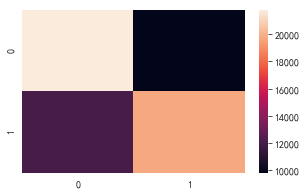

In [135]:
m2 = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(5,3))
sns.heatmap(m2) # 混淆矩阵可视化

In [137]:
from sklearn.metrics import roc_auc_score
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.654955


In [138]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ks = max(tpr-fpr)
ks

0.3099107273783168